## Analyse textuelle

### Ce notebook est consacré à la génération des nuages de mots filtrés, au calcul de la fréquence des mots dans des avis Pro et Contre tokénizés et lémmatizés précédemment ('pros_clean' et 'cons_clean') ainsi qu'à l'extraction des thèmes récurrents des avis



#### Importation des librairies et du dataset avec des textes pré traités

In [9]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("cleaned_reviews_for_nlp_analysis.csv")

In [11]:
df.head()

,firm,date_review,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,...,headline,pros,cons,recommend_score,status,experience,headline_clean,pros_clean,cons_clean,full_text_clean
0,Apple,2008-01-31,5,3.0,5.0,3.0,4.0,4.0,v,v,...,We make products that poeple enjoy buying and ...,The people we work with are great and I can't ...,You have to be careful because this job can ta...,2.0,current,No information,product poeple enjoy buy,people work great not imagine life will produc...,careful job life careful need learn seperate ...,product poeple enjoy buy. people work great no...
1,Apple,2008-02-14,4,4.0,5.0,3.0,4.0,3.0,v,v,...,It is a different job because of all of the di...,The big positive for me is that I really do en...,I suppose that a con would be that there is a ...,2.0,current,No information,different job different creative product work,big positive enjoy job apple innovative change...,suppose con hard balance work home life,different job different creative product work....
2,Apple,2008-02-15,5,4.0,5.0,5.0,5.0,5.0,v,v,...,Working at Apple is the hardest job you will e...,When you work at a place like Apple you have a...,The people at Apple are living on the bleeding...,2.0,current,No information,work apple hard job love,work place like apple opportunity change way w...,people apple live bleed edge not know future h...,work apple hard job love. work place like appl...
3,Apple,2008-04-20,5,5.0,5.0,5.0,4.0,5.0,v,v,...,"A retail job that is altogether exciting, thri...",Despite the fact that it all boils down to sel...,"As part of their intensive training, there are...",2.0,current,No information,retail job altogether exciting thrilling life ...,despite fact boil sell product apple make feel...,intensive training mandatory meeting month pos...,retail job altogether exciting thrilling life ...
4,Apple,2008-04-20,2,3.0,5.0,2.0,3.0,1.0,x,x,...,Worst choice ever.,The benefits for fulltime employees were great...,Too much confidentiality. You couldn't even f...,0.0,former,No information,bad choice,benefit fulltime employee great stock option r...,confidentiality not fart getting reprimand way...,bad choice. benefit fulltime employee great st...


In [12]:
df.shape

(354200, 21)

#### Nuages des mots pour visualiser des lemmes fréquentes (les termes les plus fréquents et génériques pas encore supprimés)

##### #1 Word cloud des textes combinés

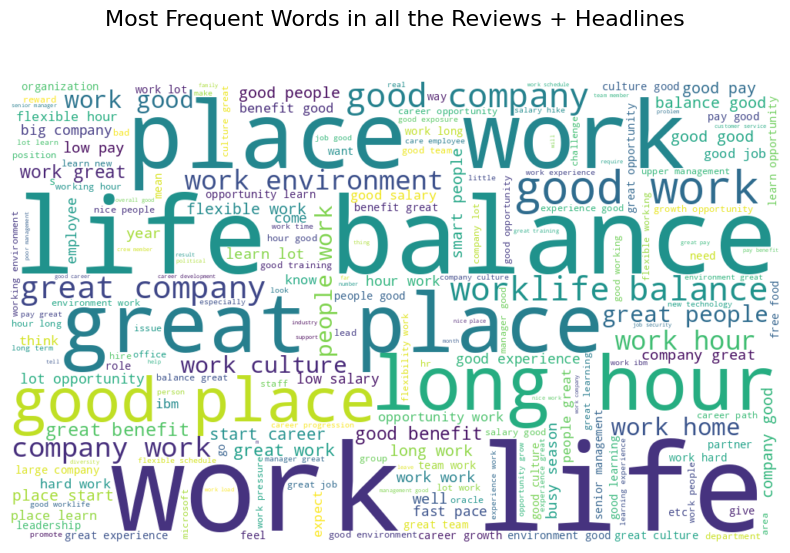

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned texts into a single string
full_text_data = ' '.join(df['full_text_clean'].fillna('').astype(str))

# Generate word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(full_text_data)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in all the Reviews + Headlines', fontsize=16, pad=40)
plt.show()

##### #2 Word Cloud des avis positives ('pros')

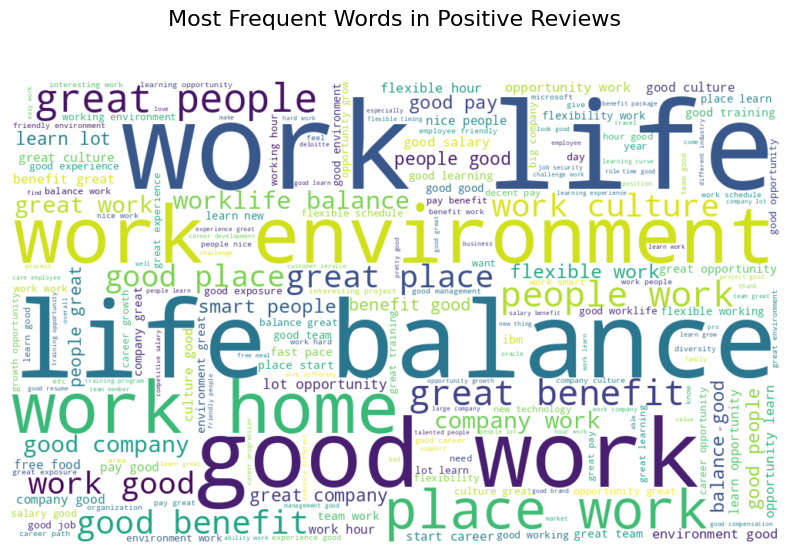

In [14]:
# Word CLoud for Pros
# Combine all pros texts into a single string
pros_data = ' '.join(df['pros_clean'].fillna('').astype(str))

# Generate word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(pros_data)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Positive Reviews', fontsize=16, pad=40)
plt.show()

##### #3 Word Cloud des avis négatives ('cons')

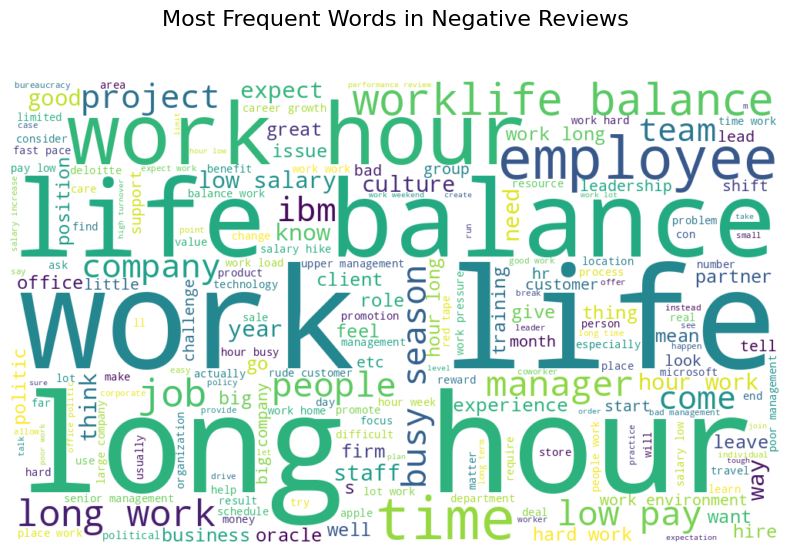

In [15]:
# Word CLoud for Сons
# Combine all cons texts into a single string
cons_data = ' '.join(df['cons_clean'].fillna('').astype(str)) #make sure that all NaN are replaced with ''

# Generate word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(cons_data)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Negative Reviews', fontsize=16, pad=40)
plt.show()

### Creation des WordClouds sans les mots fréquent mais peu informatifs (génériques et spécifiques au domaine)

#### Identification des mots les plus fréquents dans 'pros'

In [16]:
# Pros Word Cloud without most common words
from collections import Counter

# Combine all pros texts into a single string
pros_text = ' '.join(df['pros_clean'].fillna('').astype(str))

# Split to wordsand count frequency
word_counts = Counter(pros_text.split())

# Checking top-30
common_words = word_counts.most_common(30)
for word, count in common_words:
    print(f"{word}: {count}")

work: 164315
good: 157552
great: 107170
people: 65268
opportunity: 51579
company: 47395
benefit: 45200
learn: 38410
lot: 37962
environment: 34897
culture: 32302
balance: 29154
flexible: 26342
place: 25610
pay: 25563
team: 24682
life: 24624
experience: 23089
career: 22899
job: 20973
nice: 19839
employee: 19739
training: 18600
hour: 17173
time: 17149
project: 15412
management: 15082
client: 14654
salary: 14616
flexibility: 13970


##### Création des la liste des Stop-words personnalisé pour les exclure du Word Cloud

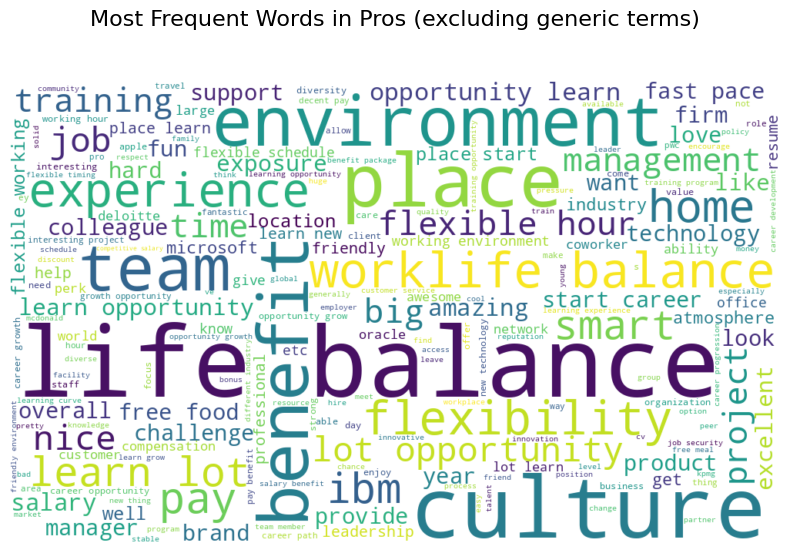

In [17]:
# Create custom list of stop words/generic terms to exclude from wordcloud
custom_stopwords_pros = {"good", "work", "great", "people", "company", "employee"}

# Generate word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white',
                      stopwords=custom_stopwords_pros).generate(' '.join(df['pros_clean'].fillna('').astype(str)))

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Pros (excluding generic terms)', fontsize=16, pad=40)
plt.show()

#### Suivre les mêmes étapes pour 'cons'

In [18]:
# Cons Word Cloud without most common terms
# Combine all 'cons' texts into a single string
cons_text = ' '.join(df['cons_clean'].fillna('').astype(str))

# Split to wordsand count frequency
word_counts = Counter(cons_text.split())

# Checking top-30
common_words = word_counts.most_common(30)
for word, count in common_words:
    print(f"{word}: {count}")

work: 126906
hour: 55466
not: 40670
management: 40668
long: 40210
company: 36806
time: 36781
pay: 36692
balance: 32573
people: 30486
salary: 29890
manager: 28755
employee: 27596
good: 26903
life: 26653
lot: 26322
low: 26226
job: 20118
year: 19580
bad: 19346
team: 19279
project: 17332
hard: 17245
like: 16901
high: 16549
customer: 15862
need: 15431
lack: 14115
poor: 13895
career: 13492


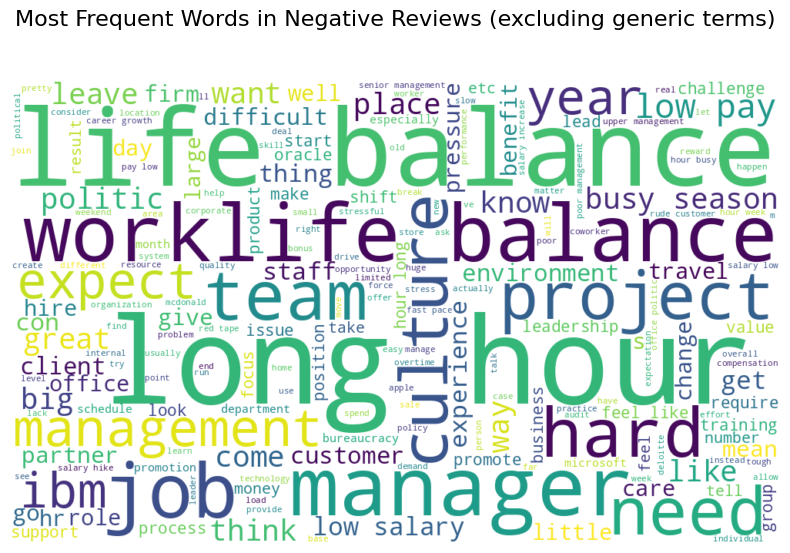

In [19]:
# Create custom list of stop words/generic terms to exclude from wordcloud for 'cons'
custom_stopwords_cons = {"work", "company", "not", "good", "bad", "employee", "lot", "time", "people"}

# Generate word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white',
                      stopwords=custom_stopwords_cons).generate(' '.join(df['cons_clean'].fillna('').astype(str)))

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Negative Reviews (excluding generic terms)', fontsize=16, pad=40)
plt.show()

### Analyse des thèmes avec TruncatedSVD or LSA

##### Commençons par 5 topics, ngram_range=(1, 2) et sans les Stop-words personnalisés

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Create custom list of stop words/generic terms to exclude from wordcloud
custom_stopwords_pros = {"good", "work", "great", "people", "company", "employee"}

# Func to remove stop words
def remove_custom_stopwords(text, custom_stopwords):
    return ' '.join([word for word in text.split() if word not in custom_stopwords])

# Apply func to 'pros_clean' column
df['pros_clean_no_stopwords'] = df['pros_clean'].fillna('').apply(lambda x: remove_custom_stopwords(x, custom_stopwords_pros))

# Vectorize the pros column
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform(df['pros_clean_no_stopwords'])

# Apply LSA
n_topics = 5
lsa = TruncatedSVD(n_components=n_topics, random_state=42)
lsa.fit(X)

# Display top words per topic
terms = vectorizer.get_feature_names_out()
for i, comp in enumerate(lsa.components_):
    terms_in_topic = [terms[j] for j in comp.argsort()[:-11:-1]]
    print(f"Topic {i+1}: {' | '.join(terms_in_topic)}")


Topic 1: balance | life | life balance | culture | benefit | opportunity | environment | learn | place | lot
Topic 2: life balance | life | balance | culture life | balance culture | benefit life | balance home | balance benefit | balance flexibility | balance flexible
Topic 3: place | learn | place learn | career | start | place start | start career | nice place | life | life balance
Topic 4: opportunity | learn | lot | learn lot | lot opportunity | learn opportunity | opportunity learn | experience | exposure | lot learn
Topic 5: culture | environment | friendly | nice | team | working | working environment | learning | environment culture | supportive


In [21]:
# same analysis for 'cons'
# Create custom list of stop words/generic terms to exclude from wordcloud for 'cons'
custom_stopwords_cons = {"work", "company", "not", "good", "bad", "employee", "lot", "time", "people", 'balance', 'life'}

# Func to remove stop words
def remove_custom_stopwords(text, custom_stopwords):
    return ' '.join([word for word in text.split() if word not in custom_stopwords])

# Apply func to 'pros_clean' column
df['cons_clean_no_stopwords'] = df['cons_clean'].fillna('').apply(lambda x: remove_custom_stopwords(x, custom_stopwords_cons))

# Vectorize the pros column
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform(df['cons_clean_no_stopwords'])

# Apply LSA
n_topics = 5
lsa = TruncatedSVD(n_components=n_topics, random_state=42)
lsa.fit(X)

# Display top words per topic
terms = vectorizer.get_feature_names_out()
for i, comp in enumerate(lsa.components_):
    terms_in_topic = [terms[j] for j in comp.argsort()[:-11:-1]]
    print(f"Topic {i+1}: {' | '.join(terms_in_topic)}")

Topic 1: hour | long | long hour | pay | busy | season | busy season | hour long | low | hour busy
Topic 2: think | think right | think moment | moment | right | pay | salary | great | management | far
Topic 3: pay | low | salary | low pay | low salary | hike | compare | management | salary hike | pay low
Topic 4: salary | hike | low salary | salary hike | low | salary low | growth | salary compare | compare | busy
Topic 5: busy | season | busy season | hour busy | pay | stressful | season hour | especially busy | long busy | especially


##### Verifions si ça va être mieux avec n-gram_range=(2,2) et parametrage additionnel de TfidfVectorizer + augmentation du numéro des thèmes à 8

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Create custom list of stop words/generic terms to exclude from wordcloud
custom_stopwords_pros = {"good", "work", "great", "people", "company", "employee"}

# Func to remove stop words
def remove_custom_stopwords(text, custom_stopwords):
    return ' '.join([word for word in text.split() if word not in custom_stopwords])

# Apply func to 'pros_clean' column
df['pros_clean_no_stopwords'] = df['pros_clean'].fillna('').apply(lambda x: remove_custom_stopwords(x, custom_stopwords_pros))

# Vectorize the pros column
vectorizer = TfidfVectorizer(
    max_df=0.9, # ignore tokens present in 90% of docs (too generic)
    min_df=10, # token present at least in 10 docs (ignore very rare bigrams)
    ngram_range=(2, 2),  # only bigrams
    stop_words='english',
    max_features=1000
)
X = vectorizer.fit_transform(df['pros_clean_no_stopwords'])

# Apply LSA
n_topics = 8
lsa = TruncatedSVD(n_components=n_topics, random_state=42)
lsa.fit(X)

# Display top words per topic
terms = vectorizer.get_feature_names_out()
for i, comp in enumerate(lsa.components_):
    terms_in_topic = [terms[j] for j in comp.argsort()[:-11:-1]]
    print(f"Topic {i+1}: {' | '.join(terms_in_topic)}")

Topic 1: life balance | culture life | benefit life | balance culture | balance benefit | balance home | flexibility life | environment life | balance flexibility | balance flexible
Topic 2: worklife balance | flexible hour | benefit worklife | culture worklife | balance benefit | lot opportunity | balance culture | learn lot | opportunity learn | balance home
Topic 3: flexible hour | free food | hour home | benefit flexible | hour easy | learn lot | environment flexible | free meal | fast pace | hour free
Topic 4: learn lot | lot opportunity | opportunity learn | start career | place learn | place start | fast pace | lot thing | lot learn | lot different
Topic 5: free food | flexible schedule | food break | fast pace | food shift | food flexible | food nice | food free | hour free | food discount
Topic 6: start career | place start | lot opportunity | opportunity learn | flexible schedule | learn opportunity | place learn | opportunity grow | learn new | learn grow
Topic 7: lot opport

##### Les thèmes sont dures à extraire comme les bigrammes sont mélangés et se répètent. C'est possible qu'il manque de richesse thématique. Si les textes sont courts et uniformes (tout le monde parle la « flexibilité » et la « culture »), le modèle ne peut pas extraire de thèmes indépendants stables. On va retourner aux unigrams et bigrams et 5 topics mais on garde le paramètres du Vectorizer

In [23]:
# PROS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Create custom list of stop words/generic terms to exclude from wordcloud
custom_stopwords_pros = {"good", "work", "great", "people", "company", "employee"}

# Func to remove stop words
def remove_custom_stopwords(text, custom_stopwords):
    return ' '.join([word for word in text.split() if word not in custom_stopwords])

# Apply func to 'pros_clean' column
df['pros_clean_no_stopwords'] = df['pros_clean'].fillna('').apply(lambda x: remove_custom_stopwords(x, custom_stopwords_pros))

# Vectorize the pros column
vectorizer = TfidfVectorizer(
    max_df=0.9, # ignore tokens present in 90% of docs (too generic)
    min_df=10, # token present at least in 10 docs (ignore very rare bigrams)
    ngram_range=(1, 2),  # unigrams and bigrams
    stop_words='english',
    max_features=1000
)
X = vectorizer.fit_transform(df['pros_clean_no_stopwords'])

# Apply LSA
n_topics = 5
lsa = TruncatedSVD(n_components=n_topics, random_state=42)
lsa.fit(X)

# Display top words per topic
terms = vectorizer.get_feature_names_out()
for i, comp in enumerate(lsa.components_):
    terms_in_topic = [terms[j] for j in comp.argsort()[:-11:-1]]
    print(f"Topic {i+1}: {' | '.join(terms_in_topic)}")

Topic 1: balance | life | life balance | culture | benefit | opportunity | environment | learn | place | lot
Topic 2: life balance | life | balance | culture life | balance culture | benefit life | balance home | balance benefit | balance flexibility | balance flexible
Topic 3: place | learn | place learn | career | start | place start | start career | nice place | life | life balance
Topic 4: opportunity | learn | lot | learn lot | lot opportunity | learn opportunity | opportunity learn | experience | exposure | client
Topic 5: culture | environment | friendly | nice | team | working | working environment | friendly environment | environment culture | supportive


In [24]:
# CONS
# same analysis for 'cons'
# Create custom list of stop words/generic terms to exclude from wordcloud for 'cons'
custom_stopwords_cons = {"work", "company", "not", "good", "bad", "employee", "lot", "time", "people", 'balance', 'life'}

# Func to remove stop words
def remove_custom_stopwords(text, custom_stopwords):
    return ' '.join([word for word in text.split() if word not in custom_stopwords])

# Apply func to 'pros_clean' column
df['cons_clean_no_stopwords'] = df['cons_clean'].fillna('').apply(lambda x: remove_custom_stopwords(x, custom_stopwords_cons))

# Vectorize the pros column
vectorizer = TfidfVectorizer(
    max_df=0.9, # ignore tokens present in 90% of docs (too generic)
    min_df=10, # token present at least in 10 docs (ignore very rare bigrams)
    ngram_range=(1, 2),  # unigrams and bigrams
    stop_words='english',
    max_features=1000
)
X = vectorizer.fit_transform(df['cons_clean_no_stopwords'])

# Apply LSA
n_topics = 5
lsa = TruncatedSVD(n_components=n_topics, random_state=42)
lsa.fit(X)

# Display top words per topic
terms = vectorizer.get_feature_names_out()
for i, comp in enumerate(lsa.components_):
    terms_in_topic = [terms[j] for j in comp.argsort()[:-11:-1]]
    print(f"Topic {i+1}: {' | '.join(terms_in_topic)}")

Topic 1: hour | long | long hour | pay | low | salary | busy | management | season | busy season
Topic 2: pay | salary | low | management | low pay | manager | hike | low salary | growth | poor
Topic 3: pay | low pay | low | pay low | hour pay | pay long | pay compare | hour low | pay hour | poor pay
Topic 4: salary | low | low salary | low pay | hike | pay | salary hike | long hour | salary low | compare
Topic 5: think | salary | low | pay | low salary | low pay | moment | long hour | right | long


### Extraction des thèmes récurrents avec LDA (Latent Dirichlet Allocation)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorisation
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['pros_clean'].fillna(''))

# Application de LDA
lda = LatentDirichletAllocation(n_components=6, random_state=42)
lda.fit(X)

# Affichage des mots-clés par thème
def print_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"Thème #{idx+1}:")
        print(" ".join([words[i] for i in topic.argsort()[-top_n:][::-1]]))
        print()

print_topics(lda, vectorizer)

Thème #1:
work company ibm employee like people year product job time

Thème #2:
good experience learn job salary learning environment training fast great

Thème #3:
opportunity great career company growth lot training benefit learn development

Thème #4:
work good balance life culture great company environment place benefit

Thème #5:
benefit flexible pay hour great time work free food easy

Thème #6:
people work great lot learn environment smart team project opportunity



In [26]:
# Vectorisation
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['cons_clean'].fillna(''))

# Application de LDA
lda = LatentDirichletAllocation(n_components=6, random_state=42)
lda.fit(X)

# Affichage des mots-clés par thème
def print_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"Thème #{idx+1}:")
        print(" ".join([words[i] for i in topic.argsort()[-top_n:][::-1]]))
        print()

print_topics(lda, vectorizer)

Thème #1:
management manager people employee work team culture politic senior lack

Thème #2:
work hour long balance life time busy pay season lot

Thème #3:
company process slow change growth career big opportunity lot large

Thème #4:
salary pay low year good hike bonus employee company benefit

Thème #5:
work project balance firm client depend worklife difficult team good

Thème #6:
work customer time bad pay job manager people shift like



#### Comme LSA et LDA n'ont pas sorti des résultas convainquants, on essaie une autre méthode - utilisation du modèle all-MiniLM-L6-v2 de la famille SentenceTransformers (de type BERT) pour générer des représentations vectorielles (embeddings) de phrases.

Ce modèle est bon pour:
- La classification ou le clustering de textes

- La recherche de similarité (semantic search)

- L’analyse thématique

##### On utilise le modèle all-MiniLM-L6-v2 via sentence-transformers en le téléchargeant directement depuis Hugging Face.

In [27]:
from transformers import AutoTokenizer, AutoModel
import torch

# Charger le tokenizer et le modèle
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

#### Convertir les textes en embeddings (ici on a besoin des textes non-lemmatisés et non tokénizés.
C'est important comme les modèles transformeurs (BERT, DistilBERT, RoBERTa, etc.) sont entraînés en langage naturel, y compris :
- les stop words (« the », “is”, « but »...),

- les déclinaisons et les conjugaisons (dans leur forme originale, pas sous forme de lemmes),

- la ponctuation (elle aide les modèles à comprendre la structure des phrases).

In [28]:
from torch.nn.functional import normalize
import numpy as np
from tqdm import tqdm

# Define function to pool meaning
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]  # Les embeddings des tokens
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

# Function to process embedding batches
def compute_embeddings_batch(texts, tokenizer, model, batch_size=64, device='cpu'):
    embeddings_list = []

    for i in tqdm(range(0, len(texts), batch_size)):
        batch_texts = texts[i:i+batch_size]
        encoded_input = tokenizer(batch_texts, padding=True, truncation=True, return_tensors='pt').to(device)

        with torch.no_grad():
            model_output = model(**encoded_input)
        embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
        embeddings = normalize(embeddings, p=2, dim=1)

        embeddings_list.append(embeddings.cpu())

    return torch.cat(embeddings_list)

# Define device to use GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Clean raw texts
pros_texts = df['pros'].fillna('').str.lower().tolist()
cons_texts = df['cons'].fillna('').str.lower().tolist()

# Compute embeddings
pros_embeddings = compute_embeddings_batch(pros_texts, tokenizer, model, batch_size=32, device=device)

# Save embeddings for future use
torch.save(pros_embeddings, 'pros_embeddings.pt')

cons_embeddings = compute_embeddings_batch(cons_texts, tokenizer, model, batch_size=32, device=device)

# Save embeddings for future use
torch.save(cons_embeddings, 'cons_embeddings.pt')


# example hot to retreive the embeddings in other sessions:
# pros_embeddings = torch.load('pros_embeddings.pt')
# cons_embeddings = torch.load('cons_embeddings.pt')

100%|██████████| 11069/11069 [08:17<00:00, 22.25it/s]


#### Clustering avec KMeans

##### Pros embeddings clustering

In [29]:
from sklearn.cluster import KMeans

# Choisir un nombre de clusters (par exemple 5)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(pros_embeddings)

# Add cluster labels to DataFrame
df_topics = df.loc[df['pros_clean_no_stopwords'].notna()].copy()
df_topics['pros_cluster'] = labels

df_topics.head()

,firm,date_review,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,...,recommend_score,status,experience,headline_clean,pros_clean,cons_clean,full_text_clean,pros_clean_no_stopwords,cons_clean_no_stopwords,pros_cluster
0,Apple,2008-01-31,5,3.0,5.0,3.0,4.0,4.0,v,v,...,2.0,current,No information,product poeple enjoy buy,people work great not imagine life will produc...,careful job life careful need learn seperate ...,product poeple enjoy buy. people work great no...,not imagine life will product tool need teach,careful job careful need learn seperate learn ...,0
1,Apple,2008-02-14,4,4.0,5.0,3.0,4.0,3.0,v,v,...,2.0,current,No information,different job different creative product work,big positive enjoy job apple innovative change...,suppose con hard balance work home life,different job different creative product work....,big positive enjoy job apple innovative change...,suppose con hard home,0
2,Apple,2008-02-15,5,4.0,5.0,5.0,5.0,5.0,v,v,...,2.0,current,No information,work apple hard job love,work place like apple opportunity change way w...,people apple live bleed edge not know future h...,work apple hard job love. work place like appl...,place like apple opportunity change way world ...,apple live bleed edge know future hold invent,0
3,Apple,2008-04-20,5,5.0,5.0,5.0,4.0,5.0,v,v,...,2.0,current,No information,retail job altogether exciting thrilling life ...,despite fact boil sell product apple make feel...,intensive training mandatory meeting month pos...,retail job altogether exciting thrilling life ...,despite fact boil sell product apple make feel...,intensive training mandatory meeting month pos...,0
4,Apple,2008-04-20,2,3.0,5.0,2.0,3.0,1.0,x,x,...,0.0,former,No information,bad choice,benefit fulltime employee great stock option r...,confidentiality not fart getting reprimand way...,bad choice. benefit fulltime employee great st...,benefit fulltime stock option retirement huge ...,confidentiality fart getting reprimand way fee...,4


In [30]:
df_topics['pros_cluster'].nunique()

5

##### Visualisation des exemples des texts dans chaque 'Pros' cluster

In [31]:
# Show 5 text examples for each cluster
for i in range(n_clusters):
    print(f"\nCluster {i}")
    print(df_topics[df_topics['pros_cluster'] == i]['pros_clean_no_stopwords'].sample(5).tolist())


Cluster 0
['flexible manage time salary important brand help stand', 'huge ability different department', 'resource willing let tackle large project technological infrastructure excellent', 'big lot different kind opportunity career', 'invest development new technology team have lot positive entropy']

Cluster 1
['friend manager nice helpful fun activity outside workplaceget discount food', 'include chose flexible hour reason oracle normally need complete project timely manner manager count hour late weekend finish project comfortable early personal matter course place learn oracle application product database offer excellent training resource oracle university', 'flexible timing smart intelligent', 'flexible lot hour', 'worklife balance home sick leave free time office']

Cluster 2
['gain experience future job s pretty nice get job nicer experience', 'fast promotion learn environment smart diversity', 'exposure large number project open door grad scheme', 'excellent opportunity caree

##### Extraction des 10 top termes de chaque cluster pour faciliter la déduction des thèmes

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join texts inside each cluster
pros_cluster_texts = df_topics.groupby('pros_cluster')['pros_clean_no_stopwords'].apply(lambda texts: ' '.join(texts))

# Vectorize each cluster and show top terms
for cluster, text in pros_cluster_texts.items():
    print(f"\nCluster {cluster}:")

    vectorizer = TfidfVectorizer(max_features=10, stop_words='english')
    tfidf = vectorizer.fit_transform([text])

    pros_top_words = vectorizer.get_feature_names_out()
    print("Top terms:", ', '.join(pros_top_words))


Cluster 0:
Top terms: benefit, big, brand, client, culture, ibm, lot, opportunity, product, technology

Cluster 1:
Top terms: balance, culture, environment, flexibility, flexible, home, hour, life, opportunity, time

Cluster 2:
Top terms: career, environment, experience, learn, learning, lot, opportunity, place, project, training

Cluster 3:
Top terms: culture, environment, food, friendly, fun, lot, nice, opportunity, place, team

Cluster 4:
Top terms: benefit, decent, environment, job, lot, nice, opportunity, pay, salary, time


#### Interprétation des résultats. Déduction des 5 thèmes principaux dans 'Pros'

Cluster 0 - Corporate brand/technology

Cluster 1 - Work-life balance/flexibility

Cluster 2 - Learning/career opportunities

Cluster 3 - Friendly culture/workplace

Cluster 4 - Salary/working conditions

#### Le même analyse pour 'Cons'

##### 'Cons' embeddings clustering

In [33]:
# Choisir un nombre de clusters (par exemple 5)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(cons_embeddings)

# Create temp df for cons
df_cons = df.loc[df['cons_clean_no_stopwords'].notna()].copy()
df_cons['cons_cluster'] = labels

# Add cons_cluster column to df_topic dataframe
df_topics = df_topics.join(df_cons['cons_cluster'], how='left')
df_topics.head()

,firm,date_review,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,...,status,experience,headline_clean,pros_clean,cons_clean,full_text_clean,pros_clean_no_stopwords,cons_clean_no_stopwords,pros_cluster,cons_cluster
0,Apple,2008-01-31,5,3.0,5.0,3.0,4.0,4.0,v,v,...,current,No information,product poeple enjoy buy,people work great not imagine life will produc...,careful job life careful need learn seperate ...,product poeple enjoy buy. people work great no...,not imagine life will product tool need teach,careful job careful need learn seperate learn ...,0,4
1,Apple,2008-02-14,4,4.0,5.0,3.0,4.0,3.0,v,v,...,current,No information,different job different creative product work,big positive enjoy job apple innovative change...,suppose con hard balance work home life,different job different creative product work....,big positive enjoy job apple innovative change...,suppose con hard home,0,0
2,Apple,2008-02-15,5,4.0,5.0,5.0,5.0,5.0,v,v,...,current,No information,work apple hard job love,work place like apple opportunity change way w...,people apple live bleed edge not know future h...,work apple hard job love. work place like appl...,place like apple opportunity change way world ...,apple live bleed edge know future hold invent,0,3
3,Apple,2008-04-20,5,5.0,5.0,5.0,4.0,5.0,v,v,...,current,No information,retail job altogether exciting thrilling life ...,despite fact boil sell product apple make feel...,intensive training mandatory meeting month pos...,retail job altogether exciting thrilling life ...,despite fact boil sell product apple make feel...,intensive training mandatory meeting month pos...,0,2
4,Apple,2008-04-20,2,3.0,5.0,2.0,3.0,1.0,x,x,...,former,No information,bad choice,benefit fulltime employee great stock option r...,confidentiality not fart getting reprimand way...,bad choice. benefit fulltime employee great st...,benefit fulltime stock option retirement huge ...,confidentiality fart getting reprimand way fee...,4,3


In [34]:
df_topics['cons_cluster'].nunique()

5

In [35]:
# Save dataset with the topics clusters
df_topics.to_csv('df_topics.csv', index=False)

##### Visualisation des exemples des texts dans chaque 'Cons' cluster

In [36]:
# Show 5 text examples for each 'cons' cluster
for i in range(n_clusters):
    print(f"\nCluster {i}")
    print(df_topics[df_topics['cons_cluster'] == i]['cons_clean_no_stopwords'].sample(5).tolist())


Cluster 0
['scenario come', 'find con', 'mcdonald', 'con', '']

Cluster 1
['pay second tier old timer mean pretty stagnant idea', 'salary big overtime tradition', 'pay market benchmark pay big external role outside accountancy firm', 'sure come high compensation possible certain department impossible get raise high perform include promotion little pay pay leave hit year mark able come return high pay', 'low pay long hour secrecy']

Cluster 2
['monotonous', 'stress job', 'worklife ot usual', 'long hour tight deadline', 'hour free go try schedule']

Cluster 3
['horrible boss fear', 'increment unlucky stuck project', 'political hard navigate', '', 'mcdonald']

Cluster 4
['legacy old management style', 'limited room grow poor management', 'benefit unused medicaldentaleye insurance feel expensive corporation like ibm', 'place compassion lie lie lie hire fall promise suck culture ethical performer value male dominant place white blonde chance vision crap diversity agenda push issue horrible

##### Extraction des 10 top termes de chaque cluster pour faciliter la déduction des thèmes

In [37]:
# Join texts inside each cluster
cons_cluster_texts = df_topics.groupby('cons_cluster')['cons_clean_no_stopwords'].apply(lambda texts: ' '.join(texts))

# Vectorize each cluster and show top terms
for cluster, text in cons_cluster_texts.items():
    print(f"\nCluster {cluster}:")

    vectorizer = TfidfVectorizer(max_features=10, stop_words='english')
    tfidf = vectorizer.fit_transform([text])

    cons_top_words = vectorizer.get_feature_names_out()
    print("Top terms:", ', '.join(cons_top_words))


Cluster 0:
Top terms: come, downside, experience, far, great, mention, moment, negative, place, think

Cluster 1:
Top terms: benefit, bonus, compensation, hike, hour, low, management, pay, salary, year

Cluster 2:
Top terms: busy, day, hard, high, hour, job, long, pay, season, worklife

Cluster 3:
Top terms: hard, hike, like, need, politic, process, project, slow, team, travel

Cluster 4:
Top terms: culture, customer, job, lack, like, management, manager, project, team, year


#### Interprétation des résultats. Déduction des 5 thèmes principaux dans 'Cons'
Cluster 0 - General dissatisfaction/vague complaints

Cluster 1 - Low salary/compensation

Cluster 2 - Long hours/poor work-life balance

Cluster 3 - Slow processes/internal politics

Cluster 4 - Management/organizational issues

#### Réduction de dimention avec PCA pour visualisation des clusters des thèmes des avis négatives

##### Exemple de visualisation des clusters pour les avis négatifs

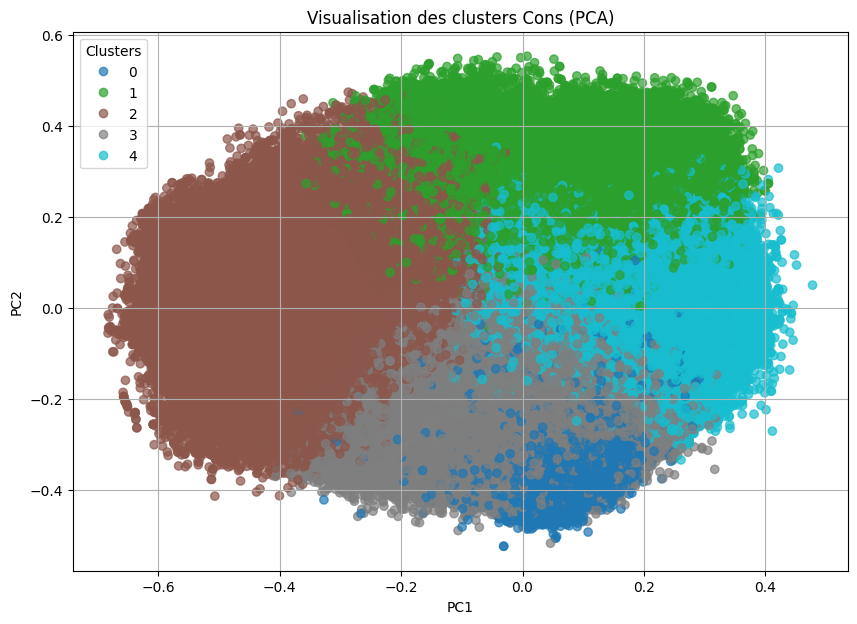

In [38]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Réduire les dimensions à 2D pour la visualisation
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(cons_embeddings)

# Afficher les clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='tab10', alpha=0.7)

# Ajouter une légende
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title("Visualisation des clusters Cons (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()